In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [118]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
sales = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
test = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")
items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")

In [120]:
items.head()


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [121]:
sales.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [122]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [123]:
## Translation from russian to English using translated files used from https://www.kaggle.com/orhankaramancode/filestranslated
shops_t = pd.read_csv("../input/filestranslated/shops-translated.csv")
items_t = pd.read_csv("../input/filestranslated/items-translated.csv")
item_categories_t = pd.read_csv("../input/filestranslated/categories_translated.csv")

In [124]:
items_t.head()

,item_id,item_name_translated
0,0,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,! ABBYY FineReader 12 Professional Edition Ful...
2,2,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,*** BLUE WAVE (Univ) D
4,4,*** BOX (GLASS) D


In [125]:
shops_t.head()

,shop_id,shop_name_translated
0,0,"Yakutsk Ordzhonikidze, 56 francs"
1,1,"Yakutsk TC ""Central"" franc"
2,2,"Adygea Shopping Center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""


In [126]:
item_categories_t.head()

,Unnamed: 0,item_category_name,item_category_id
0,0,PC - Headsets / Headphones,0
1,1,Accessories - PS2,1
2,2,Accessories - PS3,2
3,3,Accessories - PS4,3
4,4,Accessories - PSP,4


In [127]:
# items (items-translated.csv was missing the category ids - join the original items.csv)

del items['item_name']
items = items.merge(items_t, how='left', on='item_id')
items.rename(columns={'item_name_translated': 'item_name'}, inplace=True)

In [128]:
items.head()

,item_id,item_category_id,item_name
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,76,! ABBYY FineReader 12 Professional Edition Ful...
2,2,40,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,40,*** BLUE WAVE (Univ) D
4,4,40,*** BOX (GLASS) D


In [129]:
# Item categories
del item_categories_t['Unnamed: 0']
item_categories = item_categories_t

In [130]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [131]:
#shops
shops_t.rename(columns={'shop_name_translated':'shop_name'},inplace=True)
shops = shops_t

In [132]:
shops.head()

,shop_id,shop_name
0,0,"Yakutsk Ordzhonikidze, 56 francs"
1,1,"Yakutsk TC ""Central"" franc"
2,2,"Adygea Shopping Center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""


## EDA - Explore data


In [133]:
# Descriptive statistics
# Sales

print('rows and columns: ', sales.shape, '\n')
print(sales.info(),'\n')
print(sales.count(), '\n')
print('missing values: \n', sales.isna().sum())

rows and columns:  (2935849, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None 

date              2935849
date_block_num    2935849
shop_id           2935849
item_id           2935849
item_price        2935849
item_cnt_day      2935849
dtype: int64 

missing values: 
 date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [134]:
sales.sort_values(by=['date','shop_id','item_id']).head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
32569,01.01.2013,0,2,991,99.0,1.0
32552,01.01.2013,0,2,1472,2599.0,1.0
32632,01.01.2013,0,2,1905,249.0,1.0
32459,01.01.2013,0,2,2920,599.0,2.0
32504,01.01.2013,0,2,3320,1999.0,1.0


### Descriptive stats for item_cnt_day

Since the task is to predict counts for each item-store combination in one month, it will be good to look at the statistics for the item_cnt_day column.


In [135]:
print('\nitem_cnt_day descriptive statistics')
print( sales.item_cnt_day.describe().apply(lambda x: format(x, '10.1f')) )



item_cnt_day descriptive statistics
count     2935849.0
mean            1.2
std             2.6
min           -22.0
25%             1.0
50%             1.0
75%             1.0
max          2169.0
Name: item_cnt_day, dtype: object


Observation:
 
   1. max count is much higher than the average, indicating larger outliers ( Scatter plots with a data that doesnot fit the pattern).
   2. the min count is -22, indicating items return
   3. teh 25% and 75% quartiles for item_cnt_day = 1.0, indicating most sales are for one item

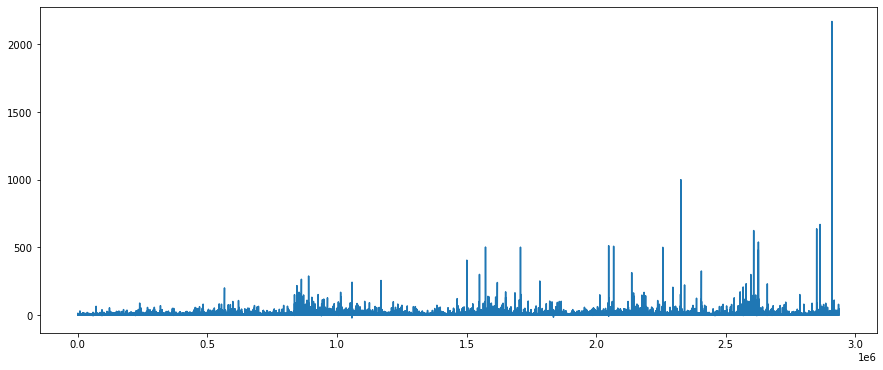

In [136]:
# The item_count series shows some purchases with huge counts

sales.item_cnt_day.plot(figsize=(15,6))
plt.show()

Text(0.5, 1.0, 'Item Count')

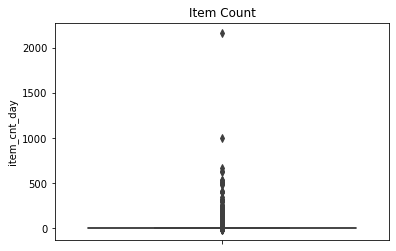

In [137]:
# There are lots of outliers in the with large quantites

sns.boxplot(y='item_cnt_day', data=sales)
plt.title('Item Count')

In [138]:
sales.min()

date              01.01.2013
date_block_num             0
shop_id                    0
item_id                    0
item_price                -1
item_cnt_day             -22
dtype: object

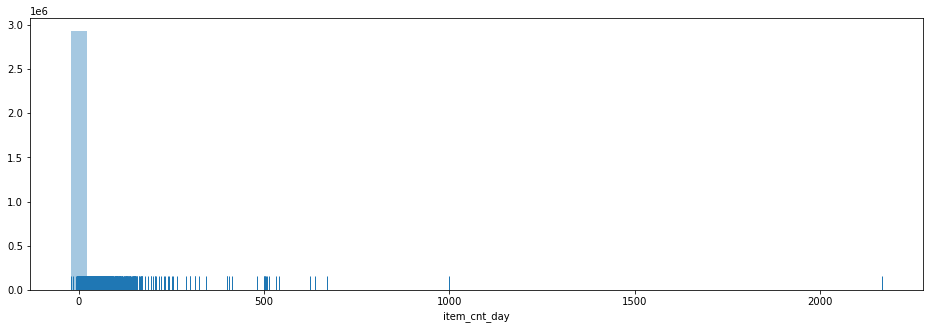

In [139]:
# Generate item_cnt_day outliers plot

plt.figure(figsize=(16,5))
sns.distplot(sales['item_cnt_day'], kde = False, rug=True)
# plt.xlim(-20, 500)
plt.show()

In [140]:
# how many zero or negative item_cnt_days?

print( 'zero item_cnt_days:', len ( sales.loc[sales['item_cnt_day']==0] ) )
print( 'negative item_cnt_days:', len ( sales.loc[sales['item_cnt_day']<0] ) )

zero item_cnt_days: 0
negative item_cnt_days: 7356


## Transform Dates

1. Convert data field to datetime
2. add some additional date features

In [141]:
# convert the date field to pandas datetime

sales.loc[: , ('date') ] = pd.to_datetime(sales.loc[: , ('date') ] , format ='%d.%m.%Y') 

In [142]:
# add year, month and day columns

sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day

In [143]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15


In [144]:
# create a year-month field
sales['year_month'] = sales['date'].map(lambda x: 100*x.year + x.month)

In [145]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2,201301
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3,201301
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5,201301
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6,201301
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15,201301


In [146]:
# create a weekday field (0=Mon, 6=Sun)
sales['day_of_week'] = sales['date'].map(lambda x: x.weekday())

In [147]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,day_of_week
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2,201301,2
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3,201301,3
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5,201301,5
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6,201301,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15,201301,1


In [148]:
# Sort values in dataframe, order the columns, reset the index

sales = sales.sort_values(by=['date','shop_id','item_id'], ascending=[True, True, True])

In [149]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,day_of_week
32569,2013-01-01,0,2,991,99.0,1.0,2013,1,1,201301,1
32552,2013-01-01,0,2,1472,2599.0,1.0,2013,1,1,201301,1
32632,2013-01-01,0,2,1905,249.0,1.0,2013,1,1,201301,1
32459,2013-01-01,0,2,2920,599.0,2.0,2013,1,1,201301,1
32504,2013-01-01,0,2,3320,1999.0,1.0,2013,1,1,201301,1


In [150]:
sales_dates = ['date','date_block_num','year_month','year','month','day','day_of_week']
sales_data = ['shop_id','item_id','item_price','item_cnt_day']
sales = sales[sales_dates + sales_data]

In [151]:
sales.reset_index(drop=True, inplace=True)

In [152]:
sales.head()

,date,date_block_num,year_month,year,month,day,day_of_week,shop_id,item_id,item_price,item_cnt_day
0,2013-01-01,0,201301,2013,1,1,1,2,991,99.0,1.0
1,2013-01-01,0,201301,2013,1,1,1,2,1472,2599.0,1.0
2,2013-01-01,0,201301,2013,1,1,1,2,1905,249.0,1.0
3,2013-01-01,0,201301,2013,1,1,1,2,2920,599.0,2.0
4,2013-01-01,0,201301,2013,1,1,1,2,3320,1999.0,1.0


### EDA (Exploratory Data Analysis) - Time series trends

In [153]:
daily_count_sum = sales.groupby('date')['item_cnt_day'].sum()

In [154]:
daily_count_sum.head()

date
2013-01-01    1951.0
2013-01-02    8198.0
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
Name: item_cnt_day, dtype: float64

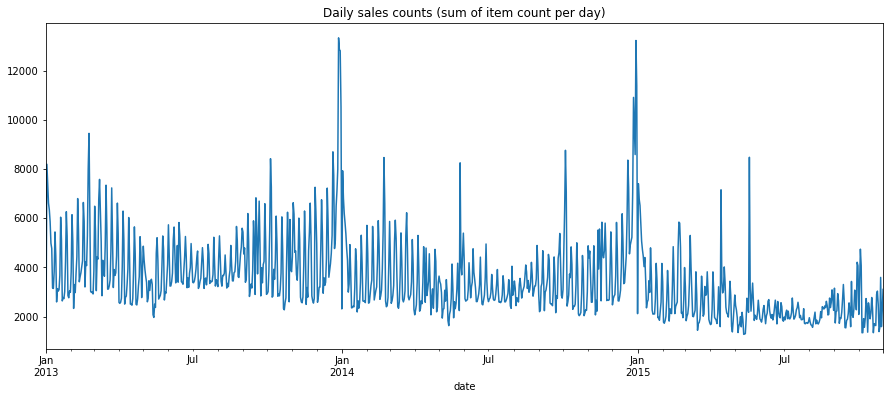

In [155]:
# overall time series trend - downward sales volume

daily_count_sum.plot(figsize=(15,6))
plt.title('Daily sales counts (sum of item count per day)')
plt.show()

In [156]:
# Yearly trend shows certain months like Jan and December have higher volumes 
# Monthly sums

count_by_month = pd.DataFrame(sales.groupby('month')['item_cnt_day'].sum())
count_by_month.reset_index(inplace=True)

In [157]:
count_by_month.head()

,month,item_cnt_day
0,1,359349.0
1,2,321975.0
2,3,344453.0
3,4,281573.0
4,5,277055.0


In [158]:
# Janauray is 1 getting 1 and 12 month i.e Jan and Dec
count_by_month_jd = count_by_month.loc[count_by_month['month'].isin([1,12])]
count_by_month_other = count_by_month.loc[ ~ count_by_month['month'].isin([1,12])]

In [159]:
count_by_month_jd.head()

,month,item_cnt_day
0,1,359349.0
11,12,352097.0


In [160]:
count_by_month_other.head()

,month,item_cnt_day
1,2,321975.0
2,3,344453.0
3,4,281573.0
4,5,277055.0
5,6,286924.0


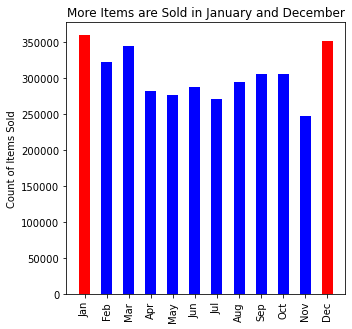

In [161]:
# Graph the data
objects = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
objects_other = ('Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov')
objects_jd = ('Jan', 'Dec')

x_pos = np.arange(len(objects))
x_pos_other = np.array([1,2,3,4,5,6,7,8,9,10])
x_pos_jd = np.array([0,11])

plt.figure(figsize=(5,5))
width=0.5

rects_other = plt.bar(x_pos_other, count_by_month_other.item_cnt_day, width, color='b')
rects_jd = plt.bar(x_pos_jd, count_by_month_jd.item_cnt_day, width, color='r')

plt.xticks(x_pos, objects, rotation=90)
plt.title('More Items are Sold in January and December')
plt.ylabel('Count of Items Sold')
plt.xlabel(None)
plt.show() 

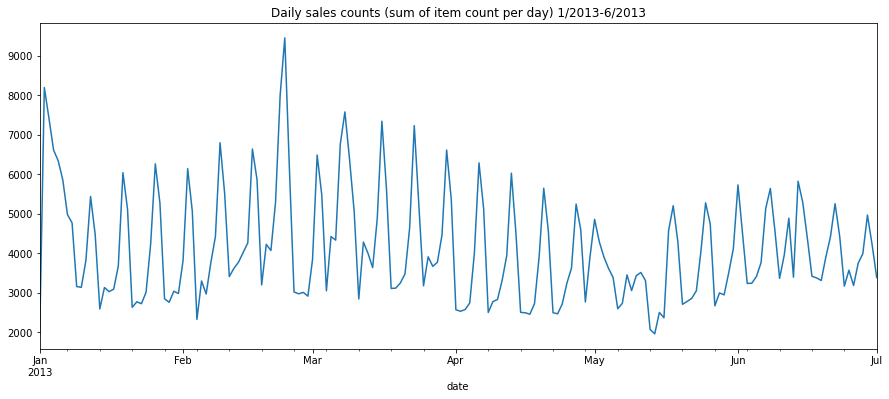

In [162]:
# Weekly time series trend - peaks and troughs can be observed for every week

daily_count_sum['2013-01-01':'2013-07-01'].plot(figsize=(15,6)) # Weekly peaks/through can be observed

plt.title('Daily sales counts (sum of item count per day) 1/2013-6/2013')
plt.show()

In [163]:
# Weekly cycles occur because weekend sales are higher

count_by_day = pd.DataFrame( sales.groupby('day_of_week')['item_cnt_day'].sum())
count_by_day.reset_index(inplace=True)

In [164]:
count_by_day.head()

,day_of_week,item_cnt_day
0,0,401487.0
1,1,454985.0
2,2,439714.0
3,3,454623.0
4,4,553455.0


In [165]:
# Weekdays, weekends

count_by_day_we = count_by_day.loc[ count_by_day['day_of_week'] >= 5]
count_by_day_wd = count_by_day.loc[ count_by_day['day_of_week'] < 5 ]

In [166]:
count_by_day_we.head()

,day_of_week,item_cnt_day
5,5,734648.0
6,6,609294.0


In [167]:
count_by_day_wd.head()

,day_of_week,item_cnt_day
0,0,401487.0
1,1,454985.0
2,2,439714.0
3,3,454623.0
4,4,553455.0


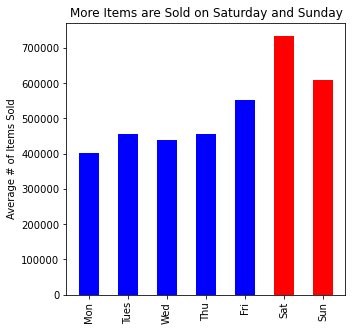

In [168]:
# Graph

objects = ('Mon','Tues','Wed','Thu','Fri','Sat','Sun')
objects_wd = ('Mon','Tues','Wed','Thu','Fri')
objects_we = ('Sat','Sun')

x_pos = np.arange(len(objects))
x_pos_wd = np.arange(len(objects_wd))
x_pos_we =(5,6)

plt.figure(figsize=(5,5))
width=0.5

rects_wd = plt.bar(x_pos_wd, count_by_day_wd.item_cnt_day, width, color='b')
rects_we = plt.bar(x_pos_we, count_by_day_we.item_cnt_day, width, color='r')

plt.xticks(x_pos, objects, rotation=90)
plt.title('More Items are Sold on Saturday and Sunday')
plt.ylabel('Average # of Items Sold')
plt.xlabel(None)
plt.show() 

### EDA - for items, categories and shops

In [169]:
# merge sales with descriptive data for items, shops and categories

sales = pd.merge(sales, items, how='left',on='item_id', copy=False)
sales = sales.merge(item_categories, how='left', on='item_category_id', copy= False)
sales = sales.merge(shops, how='left',on='shop_id', copy=False)

In [170]:
sales.head()

,date,date_block_num,year_month,year,month,day,day_of_week,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_name,item_category_name,shop_name
0,2013-01-01,0,201301,2013,1,1,1,2,991,99.0,1.0,67,"3D Action Puzzle ""Dinosaurs"" Tyrannosaurus",Gifts - Development,"Adygea Shopping Center ""Mega"""
1,2013-01-01,0,201301,2013,1,1,1,2,1472,2599.0,1.0,23,"Assassin's Creed 3 [Xbox 360, Russian version]",Games - XBOX 360,"Adygea Shopping Center ""Mega"""
2,2013-01-01,0,201301,2013,1,1,1,2,1905,249.0,1.0,30,"Bestseller. Grand Theft Auto: San Andreas [PC,...",PC Games - Standard Editions,"Adygea Shopping Center ""Mega"""
3,2013-01-01,0,201301,2013,1,1,1,2,2920,599.0,2.0,21,Disney. LEGO Pirates of the Caribbean (Essenti...,Games - PSP,"Adygea Shopping Center ""Mega"""
4,2013-01-01,0,201301,2013,1,1,1,2,3320,1999.0,1.0,19,"FIFA 13 (with PS Move support) [PS3, Russian v...",Games - PS3,"Adygea Shopping Center ""Mega"""


In [171]:
# The item which sold the most units:
sales.loc[sales['item_cnt_day']==sales['item_cnt_day'].max()]

,date,date_block_num,year_month,year,month,day,day_of_week,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_name,item_category_name,shop_name
2928870,2015-10-28,33,201510,2015,10,28,2,12,11373,0.908714,2169.0,9,Delivery to the point of issue (Boxberry),Delivery of goods,Online shop Emergency


In [172]:
item_categroy_count_sums = pd.DataFrame(sales.groupby(['item_category_name'])['item_cnt_day'].sum())
item_category_count_sums = item_categroy_count_sums.reset_index()

In [173]:
item_categroy_count_sums.head()

,item_cnt_day
item_category_name,
Accessories - PS2,2.0
Accessories - PS3,19597.0
Accessories - PS4,29807.0
Accessories - PSP,2407.0
Accessories - PSVita,7413.0


In [174]:
iccs_sort = item_category_count_sums.sort_values(by='item_cnt_day', ascending=False)
iccs_sort.reset_index(inplace=True, drop=True)

In [175]:
iccs_sort.head()

,item_category_name,item_cnt_day
0,Movie - DVD,634171.0
1,PC Games - Standard Editions,456540.0
2,Music - locally produced CD,348591.0
3,Games - PS3,254887.0
4,Movie - Blu-Ray,203284.0


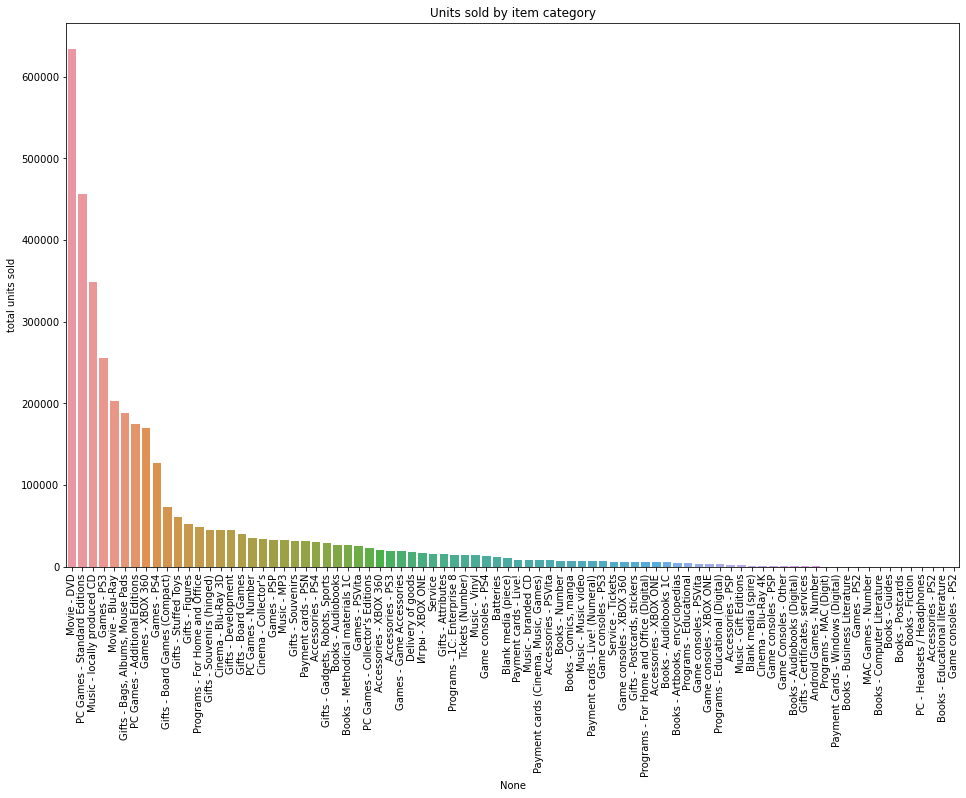

In [176]:
plt.figure(figsize=(16,10))
sns.barplot(x='item_category_name', y='item_cnt_day', data=item_category_count_sums, order=iccs_sort.item_category_name )
plt.xticks(rotation=90)
plt.xlabel('None')
plt.ylabel('total units sold')
plt.title('Units sold by item category')
plt.show()

# Drop outliers

In [177]:
# drop any records with item_cnt_day above x, where x can be changed before fitting the model.

print(sales.shape)
sales = sales.loc[sales['item_cnt_day'] <= 25]
print(sales.shape)

(2935849, 15)
(2933549, 15)


### Prepare the data for LSTM model

In [178]:
# Pivot the table to wide format
# rows = shop_id + item_id
# columns = date_bloc_num as the columns
# values = sum(item_cnt_day)

sales_monthly = sales.pivot_table(index=['shop_id','item_id'],
                                  values = ['item_cnt_day'],
                                  columns=['date_block_num'],
                                  fill_value = 0,
                                  aggfunc='sum'
                                 )

In [179]:
sales_monthly.reset_index(inplace = True)
sales_monthly.head()

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [180]:
# Left join merge the test data with the training data on item_id and shop_id
# This keeps all shop+item combinations that are required by the test set
# drops those from the training set that are not.

sales_monthly = pd.merge(test, sales_monthly, on=['shop_id', 'item_id'], how='left')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [181]:
sales_monthly.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# filling NaN with zeros
sales_monthly.fillna(0, inplace=True)

In [183]:
sales_monthly.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
# Drop ID, shop_id, and item_id as they are uniquely captured by the index

sales_monthly.drop(['ID','shop_id','item_id','ID'], inplace = True, axis=1)
sales_monthly.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
sales_monthly

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
sales_monthly.shape

(214200, 34)

In [187]:
sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   (item_cnt_day, 0)   214200 non-null  float64
 1   (item_cnt_day, 1)   214200 non-null  float64
 2   (item_cnt_day, 2)   214200 non-null  float64
 3   (item_cnt_day, 3)   214200 non-null  float64
 4   (item_cnt_day, 4)   214200 non-null  float64
 5   (item_cnt_day, 5)   214200 non-null  float64
 6   (item_cnt_day, 6)   214200 non-null  float64
 7   (item_cnt_day, 7)   214200 non-null  float64
 8   (item_cnt_day, 8)   214200 non-null  float64
 9   (item_cnt_day, 9)   214200 non-null  float64
 10  (item_cnt_day, 10)  214200 non-null  float64
 11  (item_cnt_day, 11)  214200 non-null  float64
 12  (item_cnt_day, 12)  214200 non-null  float64
 13  (item_cnt_day, 13)  214200 non-null  float64
 14  (item_cnt_day, 14)  214200 non-null  float64
 15  (item_cnt_day, 15)  214200 non-nul

In [188]:
# select all the columns except for the last for the last one for the training set
# expand to an array of 3 dimensions with shape (214200, 33,1)

X_train = np.expand_dims(sales_monthly.values[:,:-1], axis=2)
X_train.shape

(214200, 33, 1)

In [189]:
# The last column is our training labels (or truth values)
# create a 2d array with shape (214200,1)

y_train = sales_monthly.values[:,-1:]
y_train.shape

(214200, 1)

In [190]:
# select all the columns except for the first one for the test set
# expand to an array of 3 dimensions with shape (214200,33,1)

# note that it must include the last column, unlike the training set,
# but doesnot include the first columns so the arrays can be the same shape

X_test = np.expand_dims(sales_monthly.values[:,1:], axis=2)
X_test.shape

(214200, 33, 1)

# Model training plots

In [191]:
import math
import matplotlib.pyplot as plt

In [192]:
def rmse(acc):
    rmse=[]
    for i in acc:
        rmse.append(math.sqrt(i))
    return rmse

In [193]:
def plot_train_curve(history):

    colors = ['#e66101','#fdb863']
    accuracy = rmse(history.history['mean_squared_error'])
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.ticklabel_format(useOffset=False)
        plt.plot(epochs, accuracy, marker='o', c=colors[0], label='Training RMSE')
        
        axes = plt.gca()

        plt.title('Training RMSE')
        plt.legend()
        plt.show()

### LSTM Model

In [194]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import load_model, Model

In [195]:
lstm_model_1 =  Sequential()
lstm_model_1.add(LSTM(units=64, input_shape=(33,1), activation='relu')) ## add return_sequences = True
lstm_model_1.add(Dropout(0.5))
lstm_model_1.add(Dense(1))
# lstm_model_1.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
# lstm_model_1.add(LSTM(32))  # return a single vector of dimension 32
lstm_model_1.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
lstm_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [209]:
lstm_model_1_history = lstm_model_1.fit(X_train, y_train, batch_size = 1024, epochs = 20)

Epoch 1/20
210/210 [==============================] - 27s 127ms/step - loss: 43.4503 - mean_squared_error: 43.4503
Epoch 2/20
210/210 [==============================] - 26s 126ms/step - loss: 22.5903 - mean_squared_error: 22.5903
Epoch 3/20
210/210 [==============================] - 27s 129ms/step - loss: 5.0513 - mean_squared_error: 5.0513
Epoch 4/20
210/210 [==============================] - 28s 133ms/step - loss: 4.4823 - mean_squared_error: 4.4823
Epoch 5/20
210/210 [==============================] - 27s 126ms/step - loss: 3.0886 - mean_squared_error: 3.0886
Epoch 6/20
210/210 [==============================] - 27s 127ms/step - loss: 5.6536 - mean_squared_error: 5.6536
Epoch 7/20
210/210 [==============================] - 26s 126ms/step - loss: 3.4788 - mean_squared_error: 3.4788
Epoch 8/20
210/210 [==============================] - 27s 129ms/step - loss: 3.6248 - mean_squared_error: 3.6248
Epoch 9/20
210/210 [==============================] - 26s 126ms/step - loss: 4.0463 - mean_s

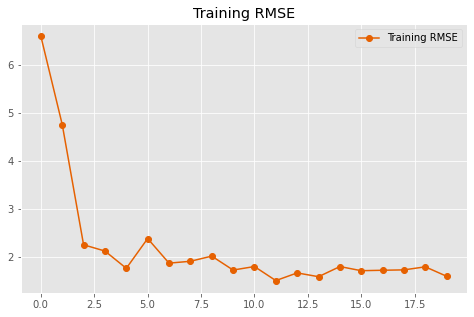

In [210]:
plot_train_curve(lstm_model_1_history)

# Output predictions to csv

In [ ]:
output = lstm_model_1.predict(X_test)
submission = pd.DataFrame({'ID':test['ID'],'item_cnt_month':output.ravel()})
submission.head()

In [201]:
submission.to_csv('sample_submission_lstm_model_1_sec.csv',index = False)

### Top 10 predicted sales increases

In [203]:
#Get sales for the last month and the predicted sales for the next month

lstm_predictions = list(output)
last_month = list(y_train)
predicted_changes = pd.DataFrame( {'last':last_month, 'pred':lstm_predictions})


In [204]:
# Get the percent difference for (predicted sales next month - sales previous month)

predicted_changes['pct_diff'] = (predicted_changes['pred'] - predicted_changes['last'])/predicted_changes['last']

In [205]:
# Remove any non-numeric results, sort the store-items by percent change, and get the top 10

predicted_changes = predicted_changes[ ~ predicted_changes['pct_diff'].isin([np.nan, np.inf, -np.inf]) ]
predicted_changes.sort_values(by='pct_diff', ascending=False, inplace=True)
predicted_changes = predicted_changes[0:9] 

In [206]:
# Reset the index and name the column ID

predicted_changes.reset_index(inplace=True)
predicted_changes.rename(columns={'index': 'ID'}, inplace=True)

In [207]:
# Join the top 10 changes with the descriptions for shop, item, and item category

predicted_changes = pd.merge(predicted_changes, test, on = ['ID'], how = 'left')
predicted_changes = pd.merge(predicted_changes, shops, on = ['shop_id'], how = 'left')
predicted_changes = pd.merge(predicted_changes, items, on = ['item_id'], how = 'left')
predicted_changes = pd.merge(predicted_changes, item_categories, on = ['item_category_id'], how = 'left')

In [208]:
# Only keep the descriptive columns and format the percentages

predicted_changes = predicted_changes[['item_name','item_category_name','shop_name','pct_diff']]

def format_pcts(x):
  x = x.astype(float)
  x = x * 100
  x = round(x,2)
  return x
  
predicted_changes['pct_diff'] = format_pcts(predicted_changes['pct_diff'])
predicted_changes.head(10)

,item_name,item_category_name,shop_name,pct_diff
0,Sword and Magic. Heroes 6. Edge of Darkness [P...,PC Games - Standard Editions,"Moscow ТЦ ""Семеновский""",10546.53
1,"Grand Theft Auto V [PS3, Russian subtitles]",Games - PS3,"Krasnoyarsk Shopping center ""June""",5570.37
2,"Grand Theft Auto V [PS3, Russian subtitles]",Games - PS3,"Yakutsk Ordzhonikidze, 56",4510.17
3,"Diablo III [PC, Jewel, Russian version]",PC Games - Standard Editions,"Samara TC ""ParkHaus""",4475.16
4,"Grand Theft Auto V [Xbox 360, Russian subtitles]",Games - XBOX 360,"Voronezh (Plekhanovskaya, 13)",4458.23
5,"Diablo III [PC, Jewel, Russian version]",PC Games - Standard Editions,"Moscow Trade Center ""Areal"" (Belyaevo)",4065.75
6,"Diablo III [PC, Jewel, Russian version]",PC Games - Standard Editions,"Kazan TC ""ParkHaus"" II",3936.37
7,"Grand Theft Auto V [Xbox 360, Russian subtitles]",Games - XBOX 360,"SPb TC ""Nevsky Center""",3884.63
8,"Grand Theft Auto V [Xbox 360, Russian subtitles]",Games - XBOX 360,Yakutsk Central shopping center,3845.75
